In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.models import load_model

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical 
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train.shape
y_train.shape

(50000, 1)

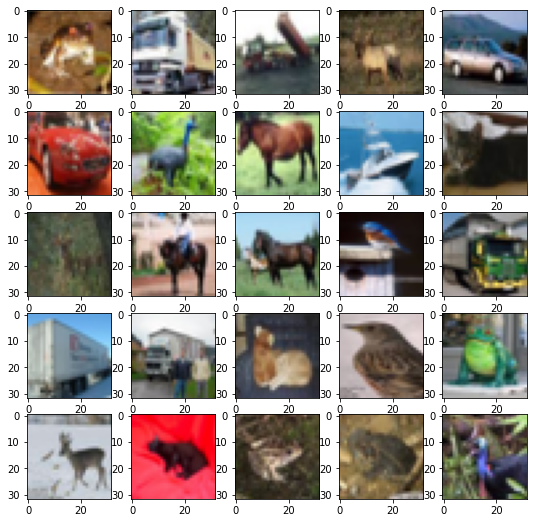

In [40]:
from numpy import subtract
plt.figure(figsize=(9,9))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
plt.show()
#0: máy bay
#1: xe hơi
#2: chim
#3: mèo
#4: hươu
#5: chó
#6: ếch
#7: ngựa
#8: tàu
#9: xe tải

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(784,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(10,activation='Softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               2409232   
                                                                 
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 3,032,522
Trainable params: 3,032,522
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
391/391 [==============================] - 21s 52ms/step - loss: 1.8176 - accuracy: 0.3503 - val_loss: 1.6735 - val_accuracy: 0.4057
Epoch 2/50
391/391 [==============================] - 20s 50ms/step - loss: 1.6263 - accuracy: 0.4197 - val_loss: 1.6558 - val_accuracy: 0.4170
Epoch 3/50
391/391 [==============================] - 20s 50ms/step - loss: 1.5462 - accuracy: 0.4499 - val_loss: 1.5198 - val_accuracy: 0.4613
Epoch 4/50
391/391 [==============================] - 19s 50ms/step - loss: 1.4793 - accuracy: 0.4749 - val_loss: 1.4931 - val_accuracy: 0.4685
Epoch 5/50
391/391 [==============================] - 26s 67ms/step - loss: 1.4264 - accuracy: 0.4949 - val_loss: 1.4633 - val_accuracy: 0.4836
Epoch 6/50
391/391 [==============================] - 21s 54ms/step - loss: 1.3891 - accuracy: 0.5080 - val_loss: 1.4538 - val_accuracy: 0.4830
Epoch 7/50
391/391 [==============================] - 19s 49ms/step - loss: 1.3598 - accuracy: 0.5165 - val_loss: 1.4015 - val_accuracy:

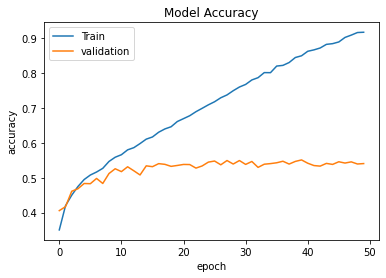

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/BT AI/cifar10.h5')

array([8])

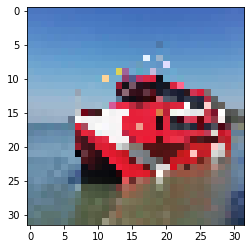

In [44]:
img = load_img('/content/drive/MyDrive/Anh AI/train/no/tau2.jpeg',target_size=(32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)